In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.codegen import Print

In [2]:
df_2019 = pd.read_csv('data_2019_update.csv')

# Кластеризуем

In [3]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [4]:
scal = StandardScaler()
norm = Normalizer()
df_for_pca_2019 = pd.DataFrame(norm.fit_transform(scal.fit_transform(df_2019)), columns=df_2019.columns, index=df_2019.index)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
for_cluster_2019 = pca.fit_transform(df_for_pca_2019)

In [7]:
from sklearn.cluster import KMeans

Сделаем цвета для кластеров, для определения кластеров в последующем анализе

In [26]:
colors_for_cluster = ["red", "green", "blue"]

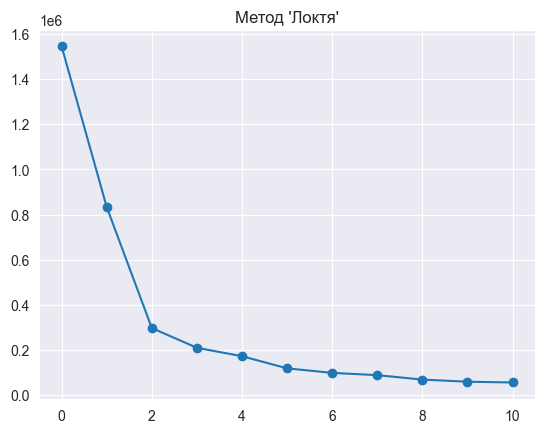

In [8]:
list_for_elbow = []
for n_clusters in range(1,12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++')
    kmeans.fit(for_cluster_2019)
    list_for_elbow.append(kmeans.inertia_)
plt.title("Метод 'Локтя'")
plt.plot(list_for_elbow, marker='o')

In [13]:
n_cluster = 3

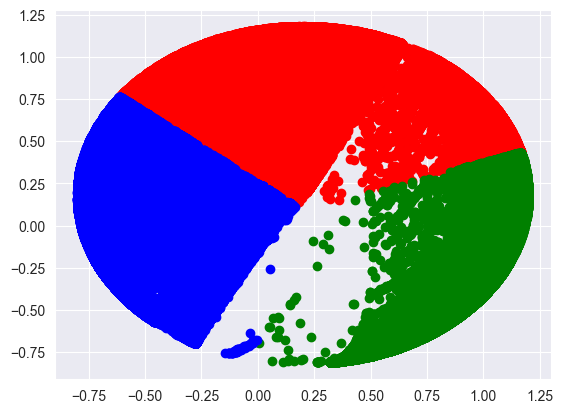

In [33]:
kmean = KMeans(n_clusters=n_cluster, random_state=1337)
kmean.fit(for_cluster_2019)
labels = kmean.labels_
for cluster in range(n_cluster):
    plt.scatter(for_cluster_2019[labels == cluster][:, 0], for_cluster_2019[labels == cluster][:, 1], color=colors_for_cluster[cluster])

In [16]:
df_2019["cluster"] = labels

In [41]:
def info_clusters(df):
    for cluster in range(n_cluster):
        print("Кластер ",cluster)
        print("Цвет ",colors_for_cluster[cluster])

        for column in df.columns:
            if column == "cluster":
                continue
            print(column," max: ", round(df[column].where(df["cluster"] == cluster).dropna().max(),2), " min: ", round(df[column].where(df["cluster"] == cluster).dropna().min(),2),
                  " mean: ", round(df[column].where(df["cluster"] == cluster).dropna().mean(),2))

In [42]:
info_clusters(df_2019)

Кластер  0
Цвет  red
trip_distance  max:  15.1  min:  0.0  mean:  1.43
fare_amount  max:  26.0  min:  0.0  mean:  8.37
extra  max:  1.3  min:  0.0  mean:  0.26
tip_amount  max:  10.0  min:  0.0  mean:  1.4
total_amount  max:  33.17  min:  0.0  mean:  13.15
time_trip  max:  42771.0  min:  0.0  mean:  598.49
Кластер  1
Цвет  green
trip_distance  max:  157.8  min:  0.0  mean:  7.55
fare_amount  max:  756.0  min:  0.0  mean:  28.56
extra  max:  9.5  min:  0.0  mean:  0.72
tip_amount  max:  400.0  min:  0.0  mean:  4.91
total_amount  max:  766.8  min:  0.0  mean:  38.34
time_trip  max:  86392.0  min:  0.0  mean:  2818.51
Кластер  2
Цвет  blue
trip_distance  max:  18.7  min:  0.0  mean:  1.73
fare_amount  max:  52.0  min:  0.0  mean:  9.74
extra  max:  87.56  min:  1.3  mean:  2.78
tip_amount  max:  14.49  min:  0.0  mean:  1.7
total_amount  max:  140.36  min:  2.5  mean:  15.03
time_trip  max:  17357.0  min:  0.0  mean:  722.79


In [48]:
def cluster_for_another_df(df):
    scal = StandardScaler()
    norm = Normalizer()
    df_for_pca_2019 = pd.DataFrame(norm.fit_transform(scal.fit_transform(df)), columns=df.columns, index=df.index)
    pca = PCA(n_components=2)
    for_cluster_2019 = pca.fit_transform(df_for_pca_2019)
    kmean = KMeans(n_clusters=n_cluster, random_state=1337)
    kmean.fit(for_cluster_2019)
    labels = kmean.labels_
    for cluster in range(n_cluster):
        plt.scatter(for_cluster_2019[labels == cluster][:, 0], for_cluster_2019[labels == cluster][:, 1], color=colors_for_cluster[cluster])
    df["cluster"] = labels
    info_clusters(df)
    return df
    

In [44]:
df_2020 = pd.read_csv('data_2020_update.csv')

Кластер  0
Цвет  red
trip_distance  max:  13.83  min:  0.0  mean:  1.44
fare_amount  max:  25.0  min:  0.0  mean:  7.84
extra  max:  1.3  min:  0.0  mean:  0.31
tip_amount  max:  9.0  min:  0.0  mean:  1.34
tolls_amount  max:  12.0  min:  0.0  mean:  0.0
total_amount  max:  27.3  min:  0.0  mean:  12.59
time_trip  max:  32758.0  min:  0.0  mean:  520.91
Кластер  1
Цвет  green
trip_distance  max:  21.3  min:  0.0  mean:  1.72
fare_amount  max:  52.0  min:  0.0  mean:  8.95
extra  max:  52.5  min:  1.3  mean:  2.83
tip_amount  max:  13.0  min:  0.0  mean:  1.6
tolls_amount  max:  13.75  min:  0.0  mean:  0.01
total_amount  max:  103.3  min:  2.0  mean:  14.18
time_trip  max:  29927.0  min:  0.0  mean:  612.12
Кластер  2
Цвет  blue
trip_distance  max:  259.22  min:  0.0  mean:  7.98
fare_amount  max:  1238.0  min:  0.0  mean:  28.39
extra  max:  9.5  min:  0.0  mean:  0.75
tip_amount  max:  450.0  min:  0.0  mean:  4.66
tolls_amount  max:  910.5  min:  0.0  mean:  1.58
total_amount  max: 

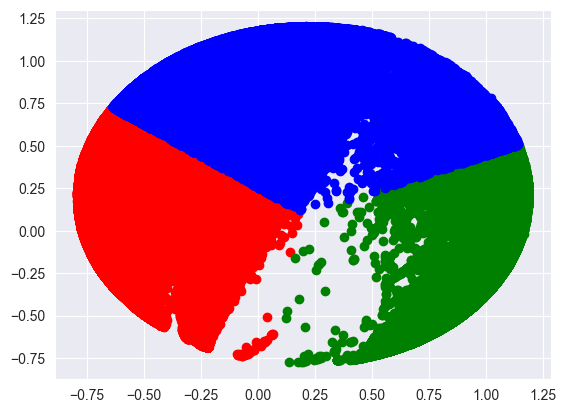

In [45]:
df_2020 = cluster_for_another_df(df_2020)

In [50]:
df_2021 = pd.read_csv('data_2021_update.csv')


Кластер  0
Цвет  red
trip_distance  max:  183.95  min:  0.0  mean:  1.45
fare_amount  max:  23.5  min:  0.0  mean:  7.58
extra  max:  1.0  min:  0.0  mean:  0.26
tip_amount  max:  4.0  min:  0.0  mean:  1.07
tolls_amount  max:  11.75  min:  0.0  mean:  0.0
total_amount  max:  24.8  min:  0.0  mean:  11.91
time_trip  max:  27472.0  min:  0.0  mean:  475.52
Кластер  1
Цвет  green
trip_distance  max:  115928.92  min:  0.0  mean:  5.39
fare_amount  max:  6965.0  min:  0.0  mean:  19.53
extra  max:  7.0  min:  0.0  mean:  0.42
tip_amount  max:  696.48  min:  0.0  mean:  3.87
tolls_amount  max:  811.75  min:  0.0  mean:  0.63
total_amount  max:  7661.28  min:  0.0  mean:  27.32
time_trip  max:  1729062.0  min:  0.0  mean:  1742.79
Кластер  2
Цвет  blue
trip_distance  max:  210.76  min:  0.0  mean:  2.03
fare_amount  max:  69.7  min:  0.0  mean:  9.55
extra  max:  7.0  min:  1.3  mean:  2.81
tip_amount  max:  13.18  min:  0.0  mean:  1.75
tolls_amount  max:  14.15  min:  0.0  mean:  0.04
tota

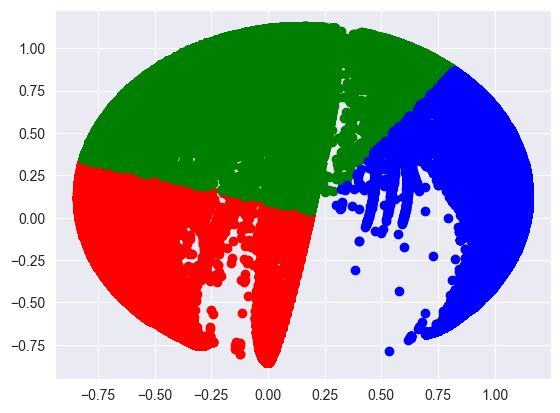

In [51]:
df_2021 = cluster_for_another_df(df_2021)


Сведем кластеры разных кодов по похожим параметрам


In [63]:
df_2020["cluster"] = df_2020["cluster"].apply(lambda x: 0 if x == 2 else (1 if x == 1 else 2))
df_2021["cluster"] = df_2021["cluster"].apply(lambda x: 2 if x == 0 else (1 if x == 2 else 0))

Делаем графики по годам 

Группируем для средних данных в году

In [71]:
df_2019_per_cluster = df_2019.groupby("cluster").mean().reset_index()
df_2019_per_cluster["year"] = 2019

In [54]:
df_2020 = df_2020.drop("tolls_amount",axis=1)

In [72]:
df_2020_per_cluster = df_2020.groupby("cluster").mean().reset_index()
df_2020_per_cluster["year"] = 2020

In [55]:
df_2021 = df_2021.drop("tolls_amount",axis=1)

In [73]:
df_2021_per_cluster = df_2021.groupby("cluster").mean().reset_index()
df_2021_per_cluster["year"] = 2021

Совмещаем по кластерам

In [152]:
cluster = 0
df_cluster_one = pd.concat([df_2019_per_cluster[df_2019_per_cluster["cluster"] == cluster], df_2020_per_cluster[df_2020_per_cluster["cluster"] == cluster],
                                df_2021_per_cluster[df_2021_per_cluster["cluster"] == cluster]])
cluster = 1
df_cluster_two = pd.concat([df_2019_per_cluster[df_2019_per_cluster["cluster"] == cluster], df_2020_per_cluster[df_2020_per_cluster["cluster"] == cluster],
                                df_2021_per_cluster[df_2021_per_cluster["cluster"] == cluster]])
cluster = 2
df_cluster_three = pd.concat([df_2019_per_cluster[df_2019_per_cluster["cluster"] == cluster], df_2020_per_cluster[df_2020_per_cluster["cluster"] == cluster],
                                df_2021_per_cluster[df_2021_per_cluster["cluster"] == cluster]])

Удаляем колонку кластера из ненадобности

In [154]:
df_cluster_one=df_cluster_one.drop("cluster", axis=1)
df_cluster_two=df_cluster_two.drop("cluster", axis=1)
df_cluster_three=df_cluster_three.drop("cluster", axis=1)

KeyError: "['cluster'] not found in axis"

Сохраним 

In [155]:
df_cluster_one.to_csv("df_cluster_one.csv", index=False)
df_cluster_two.to_csv("df_cluster_two.csv", index=False)
df_cluster_three.to_csv("df_cluster_three.csv", index=False)

Покажем графики изменения данных в кластерах по году

trip_distance


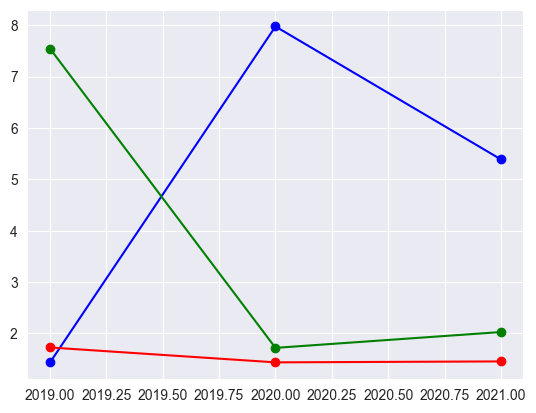

fare_amount


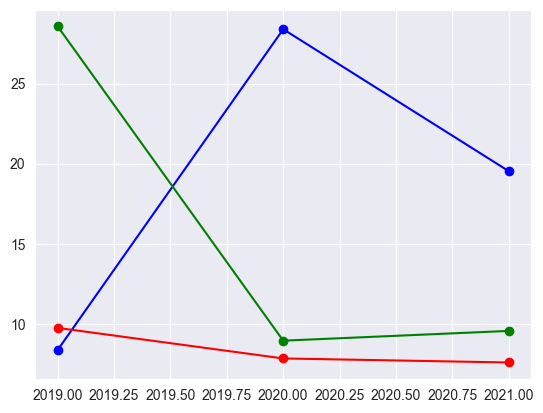

extra


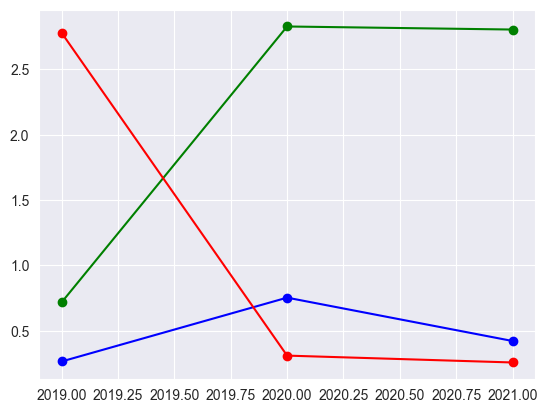

tip_amount


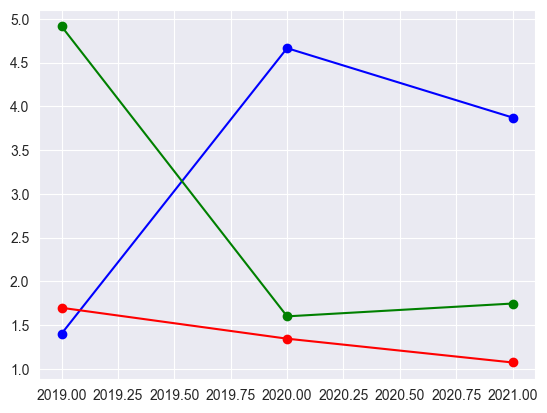

total_amount


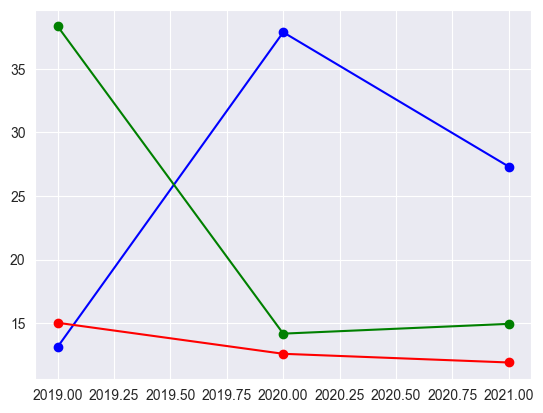

time_trip


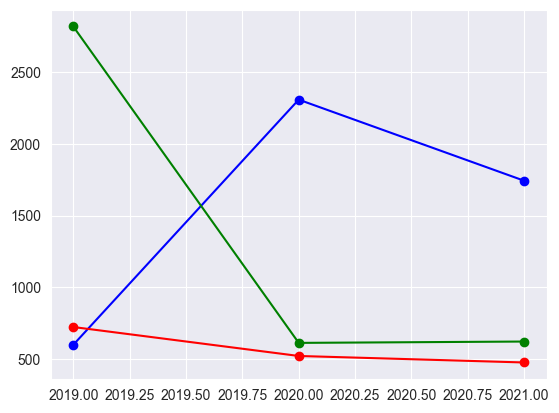

year


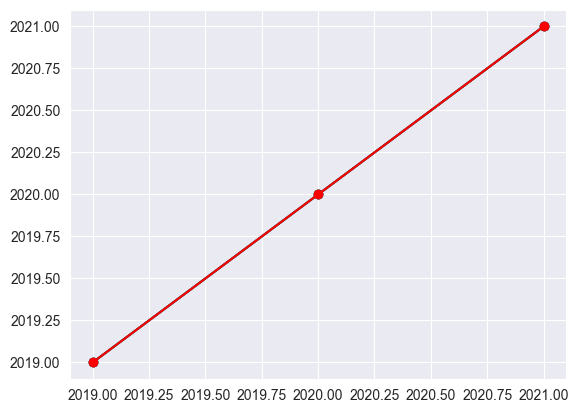

In [84]:
for column in df_cluster_one.columns:
    print(column)
    plt.plot(df_cluster_one["year"],df_cluster_one[column],color='blue',marker='o')
    plt.plot(df_cluster_two["year"],df_cluster_two[column],color='green',marker='o')
    plt.plot(df_cluster_three["year"],df_cluster_three[column],color='red',marker='o')
    plt.show()


Посотрели динамику за данный нам период

# Предсказываем динамику

In [85]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [103]:
df_cluster_one.drop("year", axis=1)

,trip_distance,fare_amount,extra,tip_amount,total_amount,time_trip
0,5.388400,19.531202,0.421373,3.871329,27.318254,1742.791844
0,7.977116,28.389839,0.753308,4.664003,37.881470,2308.368826
0,1.433020,8.373218,0.264608,1.403130,13.150493,598.492447


RandomForestRegressor

In [174]:
scaler = StandardScaler()

df_cluster_one_rfr = df_cluster_one.copy()
rfr = RandomForestRegressor(n_estimators=100, random_state=1337)
rfr.fit(scaler.fit_transform(np.array(df_cluster_one_rfr.drop("year", axis=1))[:-1].T), np.array(df_cluster_one_rfr.drop("year", axis=1))[-1])
df_cluster_one_rfr.loc[len(df_cluster_one_rfr)] = list(rfr.predict(scaler.fit_transform(np.array(df_cluster_one_rfr.drop("year", axis=1))[1:].T)))+[max(df_cluster_one_rfr["year"].unique())+1]
rfr.fit(scaler.fit_transform(np.array(df_cluster_one_rfr.drop("year", axis=1))[:-1].T), np.array(df_cluster_one_rfr.drop("year", axis=1))[-1])
df_cluster_one_rfr.loc[len(df_cluster_one_rfr)] = list(rfr.predict(scaler.fit_transform(np.array(df_cluster_one_rfr.drop("year", axis=1))[1:].T)))+[max(df_cluster_one_rfr["year"].unique())+1]

GradientBoostingRegressor

In [175]:
df_cluster_one_gbr = df_cluster_one.copy()
gbr = GradientBoostingRegressor(random_state=1337)
gbr.fit(scaler.fit_transform(np.array(df_cluster_one_gbr.drop("year", axis=1))[:-1].T), np.array(df_cluster_one_gbr.drop("year", axis=1))[-1])
df_cluster_one_gbr.loc[len(df_cluster_one_gbr)] = list(gbr.predict(scaler.fit_transform(np.array(df_cluster_one_gbr.drop("year", axis=1))[1:].T)))+[max(df_cluster_one_gbr["year"].unique())+1]
gbr.fit(scaler.fit_transform(np.array(df_cluster_one_gbr.drop("year", axis=1))[:-1].T), np.array(df_cluster_one_gbr.drop("year", axis=1))[-1])
df_cluster_one_gbr.loc[len(df_cluster_one_gbr)] = list(gbr.predict(scaler.fit_transform(np.array(df_cluster_one_gbr.drop("year", axis=1))[1:].T)))+[max(df_cluster_one_gbr["year"].unique())+1]

LinearRegression

In [176]:
df_cluster_one_lr = df_cluster_one.copy()
lr = LinearRegression()
lr.fit(scaler.fit_transform(np.array(df_cluster_one_lr.drop("year", axis=1))[:-1].T), np.array(df_cluster_one_lr.drop("year", axis=1))[-1])
df_cluster_one_lr.loc[len(df_cluster_one_lr)] = list(lr.predict(scaler.fit_transform(np.array(df_cluster_one_lr.drop("year", axis=1))[1:].T)))+[max(df_cluster_one_lr["year"].unique())+1]
lr.fit(scaler.fit_transform(np.array(df_cluster_one_lr.drop("year", axis=1))[:-1].T), np.array(df_cluster_one_lr.drop("year", axis=1))[-1])
df_cluster_one_lr.loc[len(df_cluster_one_lr)] = list(lr.predict(scaler.fit_transform(np.array(df_cluster_one_lr.drop("year", axis=1))[1:].T)))+[max(df_cluster_one_lr["year"].unique())+1]

Расмотрим предсказания и сделаем среднее среднее них

trip_distance


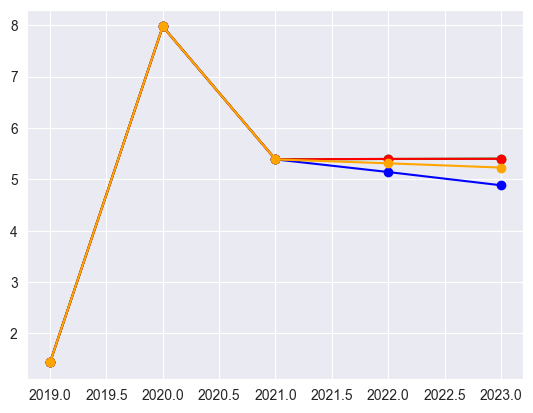

fare_amount


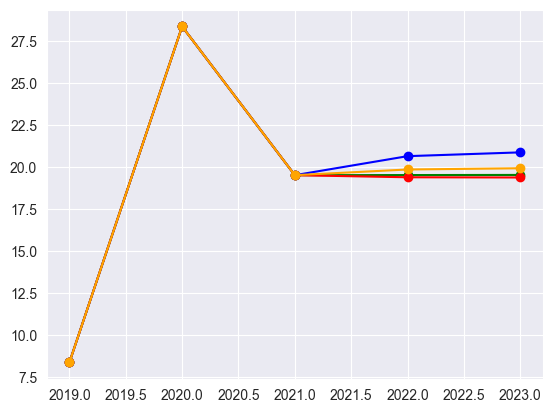

extra


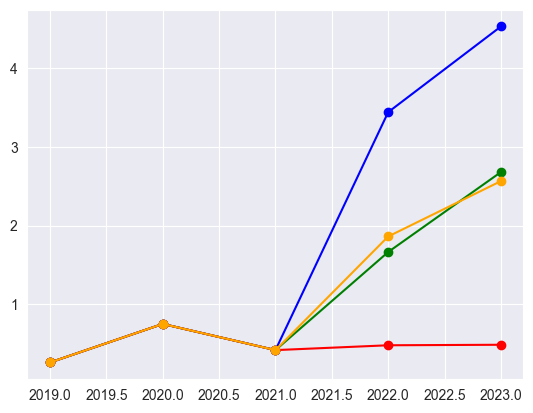

tip_amount


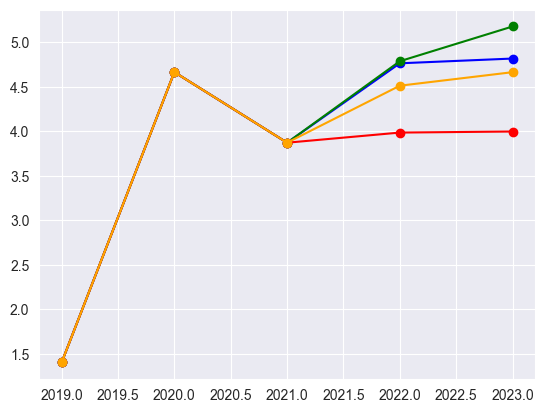

total_amount


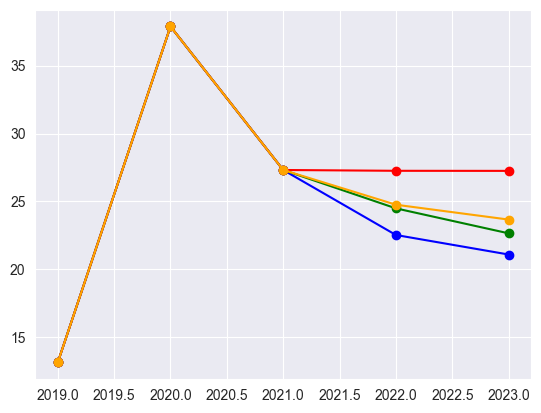

time_trip


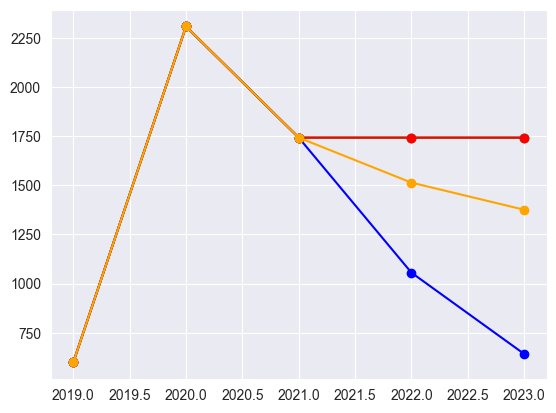

year


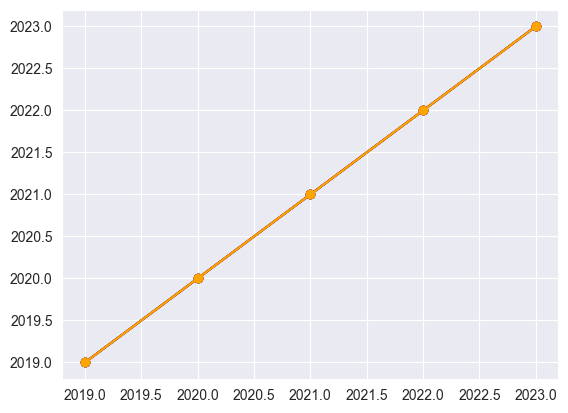

In [181]:
for column in df_cluster_one_lr.columns:
    print(column)
    plt.plot(df_cluster_one_rfr["year"],df_cluster_one_rfr[column],color='blue',marker='o')
    plt.plot(df_cluster_one_gbr["year"],df_cluster_one_gbr[column],color='green',marker='o')
    plt.plot(df_cluster_one_lr["year"],df_cluster_one_lr[column],color='red',marker='o')
    plt.plot(pd.concat([df_cluster_one_rfr,df_cluster_one_gbr,df_cluster_one_lr]).groupby("year").mean().reset_index()["year"], pd.concat([df_cluster_one_rfr,df_cluster_one_gbr,df_cluster_one_lr]).groupby("year").mean().reset_index()[column],color='orange',marker='o')
    plt.show()

По проанализированным данным можно сказать, что randomforest, по моему мнению, угадывает значения интересней

In [115]:
def model_prredict(df):
    scaler = StandardScaler()
    
    rfr = RandomForestRegressor(n_estimators=100, random_state=1337)
    rfr.fit(scaler.fit_transform(np.array(df.drop("year", axis=1))[:-1].T), np.array(df.drop("year", axis=1))[-1])
    
    print(rfr.predict(scaler.fit_transform(np.array(df.drop("year", axis=1))[1:].T)))
    df.loc[len(df)] = list(rfr.predict(scaler.fit_transform(np.array(df.drop("year", axis=1))[1:].T)))+[max(df["year"].unique())+1]
    return df